In [1]:
!pip install kaggle

Configuring the kaggle.json file 

In [2]:
import shutil
import os
from pathlib import Path

# Create the directory ~/.kaggle
kaggle_dir = Path.home() / '.kaggle'
kaggle_dir.mkdir(parents=True, exist_ok=True)

# Copy kaggle.json to ~/.kaggle/
kaggle_json_path = Path('kaggle.json')
if kaggle_json_path.exists():
    shutil.copy(kaggle_json_path, kaggle_dir / 'kaggle.json')
    os.chmod(kaggle_dir / 'kaggle.json', 0o600)
    print("kaggle.json file found")
else:
    print("Error: kaggle.json not found.")


kaggle.json file found


Importing face mask dataset 

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset


  0%|          | 0.00/163M [00:00<?, ?B/s]
  1%|          | 1.00M/163M [00:01<03:35, 791kB/s]
  1%|          | 2.00M/163M [00:01<01:46, 1.59MB/s]
  2%|▏         | 3.00M/163M [00:01<01:05, 2.58MB/s]
  2%|▏         | 4.00M/163M [00:01<00:45, 3.64MB/s]
  4%|▍         | 7.00M/163M [00:01<00:20, 7.82MB/s]
  6%|▌         | 9.00M/163M [00:01<00:16, 9.80MB/s]
  7%|▋         | 12.0M/163M [00:02<00:12, 13.2MB/s]
  9%|▉         | 15.0M/163M [00:02<00:10, 15.3MB/s]
 11%|█         | 18.0M/163M [00:02<00:08, 17.0MB/s]
 12%|█▏        | 20.0M/163M [00:02<00:08, 17.5MB/s]
 14%|█▍        | 23.0M/163M [00:02<00:07, 18.7MB/s]
 15%|█▌        | 25.0M/163M [00:02<00:07, 19.1MB/s]
 17%|█▋        | 27.0M/163M [00:02<00:07, 19.2MB/s]
 18%|█▊        | 30.0M/163M [00:03<00:06, 20.1MB/s]
 20%|█▉        | 32.0M/163M [00:03<00:06, 20.1MB/s]
 21%|██        | 34.0M/163M [00:03<00:08, 16.6MB/s]
 23%|██▎       | 37.0M/163M [00:03<00:07, 17.0MB/s]
 25%|██▍       | 40.0M/163M [00:03<00:06, 19.3MB/s]
 26%|██▌       | 42.0

Extracting the compressed dataset

In [4]:
from zipfile import ZipFile
dataset = "D:/Mathi/GITHUB/Facemask-Detection/face-mask-dataset.zip"

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print("the dataset is extracted")

the dataset is extracted


Importing the dependencies

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 # used for image processing
from PIL import Image # image processing library 
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir("D:/Mathi/GITHUB/Facemask-Detection/data/with_mask")

In [7]:
without_mask_files = os.listdir("D:/Mathi/GITHUB/Facemask-Detection/data/without_mask")

In [8]:
print("Number of with_mask images",len(with_mask_files))
print("Number of without_mask images",len(without_mask_files))

Number of with_mask images 3725
Number of without_mask images 3828


Creating Labels for the two class of images

with mask --> 1
without mask --> 0

In [9]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5]) #checking 

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
labels = with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])

7553
[1, 1, 1, 1, 1]


Displaying the images 

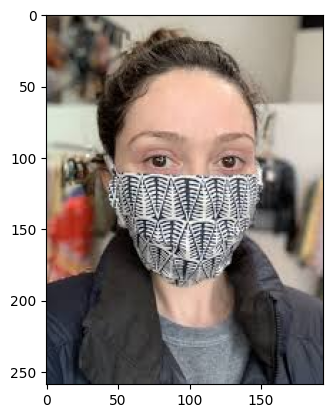

In [12]:
img = mpimg.imread("D:/Mathi/GITHUB/Facemask-Detection/data/with_mask/with_mask_2567.jpg")
imgplot = plt.imshow(img)
plt.show()

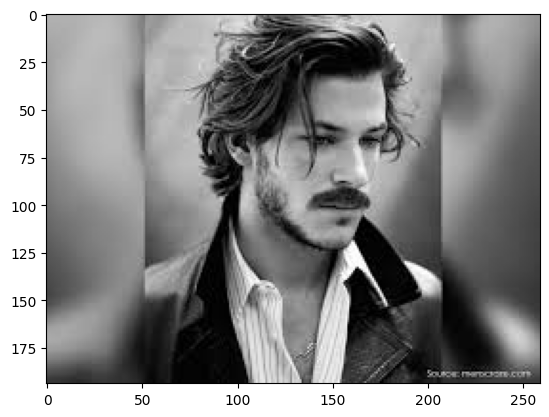

In [13]:
img = mpimg.imread("D:/Mathi/GITHUB/Facemask-Detection/data/without_mask/without_mask_2567.jpg")
imgplot = plt.imshow(img)
plt.show()

Image Processing 

1. Resize the images
2. convert the images to numpy array

## Converting images to numpy arrays

In [14]:
with_mask_path = "D:/Mathi/GITHUB/Facemask-Detection/data/with_mask/"

data = []

for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


without_mask_path = "D:/Mathi/GITHUB/Facemask-Detection/data/without_mask/"



for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)



c:\Users\Asim\anaconda3\envs\face_mask_detection\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [16]:
data[0].shape

(128, 128, 3)

converting image list n label list into numpy arrays

In [17]:
x = np.array(data)
y = np.array(labels)

In [18]:
type(x)

numpy.ndarray

In [19]:
type(y)

numpy.ndarray

In [20]:
print(x.shape)

(7553, 128, 128, 3)


TRAIN TEST SPLIT

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [22]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)
(7553,) (6042,) (1511,)


Scaling the data 

In [23]:
x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [24]:
print(x_train[0])
print(x_train_scaled[0])

[[[226 234 201]
  [211 216 188]
  [188 188 169]
  ...
  [186 181 165]
  [179 175 150]
  [166 181 136]]

 [[224 228 218]
  [201 204 195]
  [201 199 192]
  ...
  [197 190 182]
  [175 170 153]
  [162 180 143]]

 [[205 204 212]
  [221 220 226]
  [195 192 196]
  ...
  [183 174 173]
  [172 167 159]
  [181 199 171]]

 ...

 [[156 176 197]
  [159 180 196]
  [164 185 196]
  ...
  [ 89  99  71]
  [106 113  83]
  [ 99 103  68]]

 [[151 177 196]
  [167 190 208]
  [174 192 210]
  ...
  [106 113  80]
  [ 99 104  64]
  [ 98  98  41]]

 [[162 192 210]
  [177 199 220]
  [175 189 213]
  ...
  [103 107  70]
  [ 79  80  46]
  [ 99  94  61]]]
[[[0.88627451 0.91764706 0.78823529]
  [0.82745098 0.84705882 0.7372549 ]
  [0.7372549  0.7372549  0.6627451 ]
  ...
  [0.72941176 0.70980392 0.64705882]
  [0.70196078 0.68627451 0.58823529]
  [0.65098039 0.70980392 0.53333333]]

 [[0.87843137 0.89411765 0.85490196]
  [0.78823529 0.8        0.76470588]
  [0.78823529 0.78039216 0.75294118]
  ...
  [0.77254902 0.7450980

## Building the convolutional neural network

In [25]:
import torch
import torch.nn as nn
import torch.functional as F

In [27]:
num_of_classes = 2

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        # Convolutional layer block 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), padding='same')
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))

        # Convolutional layer block 2
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding='same')
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2))

        # Flatten layer
        self.flatten = nn.Flatten()

        # Dense layer block 1
        self.fc1 = nn.Linear(in_features=64 * 32 * 32, out_features=128)
        self.dropout1 = nn.Dropout(0.5)

        # Dense layer block 2
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.dropout2 = nn.Dropout(0.5)

        # Output layer
        self.fc3 = nn.Linear(in_features=64, out_features=num_of_classes)

        # relu layer 
        self.relu = nn.ReLU(0.2)

        # sigmoid layer
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        # Applying the first convolutional block
        x = self.pool1(self.relu(self.conv1(x)))

        # Applying the second convolutional block
        x = self.pool2(self.relu(self.conv2(x)))

        # Flattening the layer to feed into the dense layer
        x = self.flatten(x)

        # Applying the first dense block
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)

        # Applying the second dense block
        x = self.relu(self.fc2(x))
        x = self.dropout2(x)

        # Output layer
        x = self.sigmoid(self.fc3(x))

        return x
    

model = ConvNet()

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


Epoch [1/100], Train Loss: 0.0051, Train Acc: 99.07%, Val Loss: 0.0058, Val Acc: 94.71%
Epoch [2/100], Train Loss: 0.0051, Train Acc: 98.78%, Val Loss: 0.0058, Val Acc: 94.84%
Epoch [3/100], Train Loss: 0.0051, Train Acc: 99.04%, Val Loss: 0.0059, Val Acc: 93.91%
Epoch [4/100], Train Loss: 0.0052, Train Acc: 98.36%, Val Loss: 0.0058, Val Acc: 94.51%
Epoch [5/100], Train Loss: 0.0051, Train Acc: 99.04%, Val Loss: 0.0057, Val Acc: 94.97%
Epoch [6/100], Train Loss: 0.0051, Train Acc: 98.76%, Val Loss: 0.0059, Val Acc: 93.98%
Epoch [7/100], Train Loss: 0.0051, Train Acc: 99.01%, Val Loss: 0.0058, Val Acc: 94.77%
Epoch [8/100], Train Loss: 0.0051, Train Acc: 98.89%, Val Loss: 0.0059, Val Acc: 93.71%
Epoch [9/100], Train Loss: 0.0051, Train Acc: 98.64%, Val Loss: 0.0058, Val Acc: 94.37%
Epoch [10/100], Train Loss: 0.0051, Train Acc: 99.17%, Val Loss: 0.0058, Val Acc: 94.97%
Epoch [11/100], Train Loss: 0.0051, Train Acc: 99.07%, Val Loss: 0.0059, Val Acc: 94.31%
Epoch [12/100], Train Loss: 0.

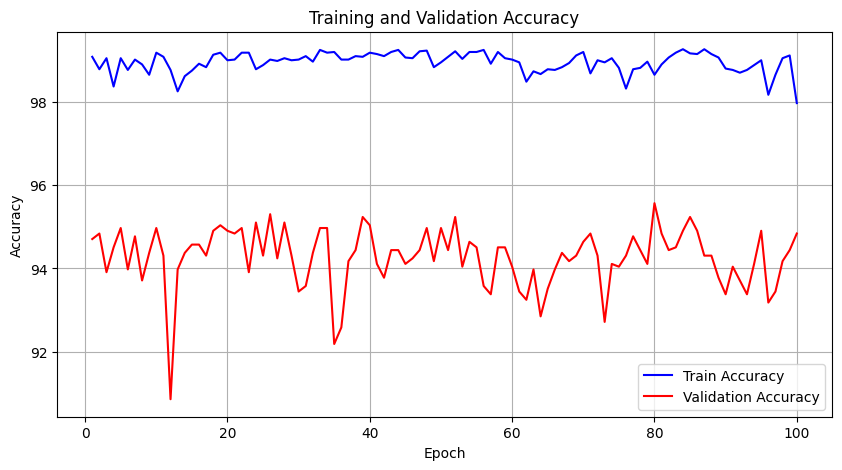

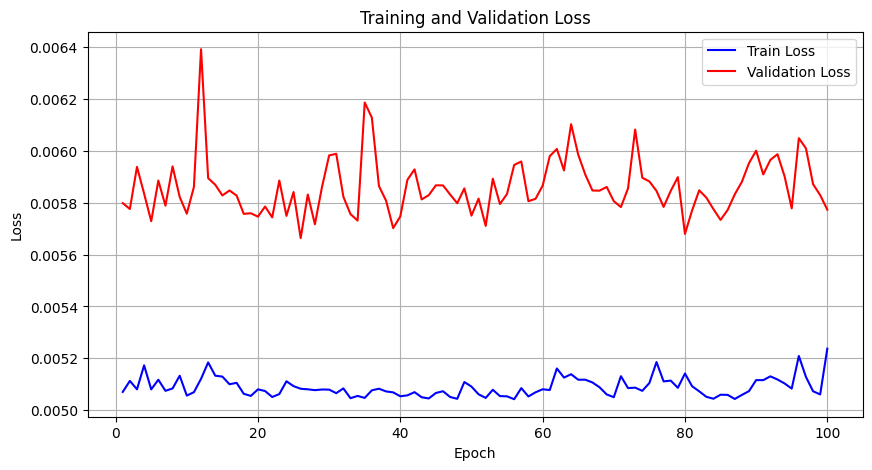

In [49]:
import torch.optim as optim
# Move model to CUDA device if available
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert numpy arrays to PyTorch tensors and move to device
x_train_scaled_tensor = torch.tensor(x_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
x_test_scaled_tensor = torch.tensor(x_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)
batch_size = 64
# Define number of epochs
num_epochs = 100

# Initialize lists to store training and validation accuracies, and training and validation losses
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training phase
    for i in range(0, len(x_train_scaled_tensor), batch_size):
        optimizer.zero_grad()  # Zero the parameter gradients

        # Move data to CUDA device
        inputs = x_train_scaled_tensor[i:i+batch_size].to(device)
        labels = y_train_tensor[i:i+batch_size].to(device)

        # Forward pass
        outputs = model(inputs.transpose(1, 3).transpose(2, 3))
        loss = criterion(outputs, labels)
        train_loss += loss.item()

        # Compute training accuracy
        _, predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    train_loss /= len(x_train_scaled_tensor)
    train_accuracy = 100 * correct_train / total_train

    # Append training accuracy and loss to lists
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for i in range(0, len(x_test_scaled_tensor), batch_size):
            inputs = x_test_scaled_tensor[i:i+batch_size].to(device)
            labels = y_test_tensor[i:i+batch_size].to(device)

            outputs = model(inputs.transpose(1, 3).transpose(2, 3))
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Compute validation accuracy
            _, predicted_val = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()

    val_loss /= len(x_test_scaled_tensor)
    val_accuracy = 100 * correct_val / total_val

    # Append validation accuracy and loss to lists
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

        # Print epoch metrics in a single line
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')

# Plotting train and validation accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting train and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
